<a href="https://colab.research.google.com/github/marcelomoresco/n2-ciencia-de-dados/blob/main/n2_materia_martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NOME: MARCELO MORESCO E LUCAS AGOSTINHO

Importar bibliotecas

In [ ]:
!pip install pandas numpy matplotlib seaborn folium geopandas nltk gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
import pandas as pd
import gdown
import nltk
from nltk.corpus import stopwords

# ids dos arquivos
bens_id = '1xOVLc9Iwn7kT2UjoDIln6C6LJeMf6JWj'
candidatos_id = '1nPfYVBeLxz7IxOhpAxbQae8c5optl7Pu'
coligacoes_id = '1AheHKnMGNG730qPgiaISY8wAAQ_i7u58'
redes_sociais_id = '1PhIH8zA0-vwlDuIIpzqPQajZEGMzNsWV'

bens_url = f'https://drive.google.com/uc?export=download&id={bens_id}'
candidatos_url = f'https://drive.google.com/uc?export=download&id={candidatos_id}'

gdown.download(bens_url, 'bem_candidato_2024_BRASIL.csv', quiet=False)
gdown.download(candidatos_url, 'consulta_cand_2024_BRASIL.csv', quiet=False)

bens = pd.read_csv('bem_candidato_2024_BRASIL.csv', encoding="latin1", delimiter=";", on_bad_lines="skip")
print("Colunas do arquivo bens:", bens.columns.tolist())

candidatos = pd.read_csv('consulta_cand_2024_BRASIL.csv', sep=';', encoding='ISO-8859-1', quotechar='"', engine='python')
print("Colunas do arquivo candidatos:", candidatos.columns.tolist())

coligacoes_url = f'https://drive.google.com/uc?export=download&id={coligacoes_id}'
redes_sociais_url = f'https://drive.google.com/uc?export=download&id={redes_sociais_id}'

coligacoes = pd.read_csv(coligacoes_url, sep=';', encoding='ISO-8859-1', quotechar='"', engine='python')
print("Colunas do arquivo coligações:", coligacoes.columns.tolist())

redes_sociais = pd.read_csv(redes_sociais_url, sep=';', encoding='ISO-8859-1', quotechar='"', engine='python')
print("Colunas do arquivo redes sociais:", redes_sociais.columns.tolist())

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1xOVLc9Iwn7kT2UjoDIln6C6LJeMf6JWj
From (redirected): https://drive.google.com/uc?export=download&id=1xOVLc9Iwn7kT2UjoDIln6C6LJeMf6JWj&confirm=t&uuid=4d8532ca-2c1d-4e8b-84ce-cc7119a7372e
To: /content/bem_candidato_2024_BRASIL.csv
100%|██████████| 223M/223M [00:01<00:00, 156MB/s]
Downloading...
From (original): https://drive.google.com/uc?export=download&id=1nPfYVBeLxz7IxOhpAxbQae8c5optl7Pu
From (redirected): https://drive.google.com/uc?export=download&id=1nPfYVBeLxz7IxOhpAxbQae8c5optl7Pu&confirm=t&uuid=f22ea0c4-894a-4335-b64f-80f5d3368bf3
To: /content/consulta_cand_2024_BRASIL.csv
100%|██████████| 245M/245M [00:02<00:00, 101MB/s]


Colunas do arquivo bens: ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_BEM_CANDIDATO', 'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO', 'DT_ULT_ATUAL_BEM_CANDIDATO', 'HH_ULT_ATUAL_BEM_CANDIDATO']
Colunas do arquivo candidatos: ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_N

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## QUESTÃO 1
O candidato eleito para prefeito (2020) é o que declarou maior quantidade de
bens (influência do poder econômico nas eleições)

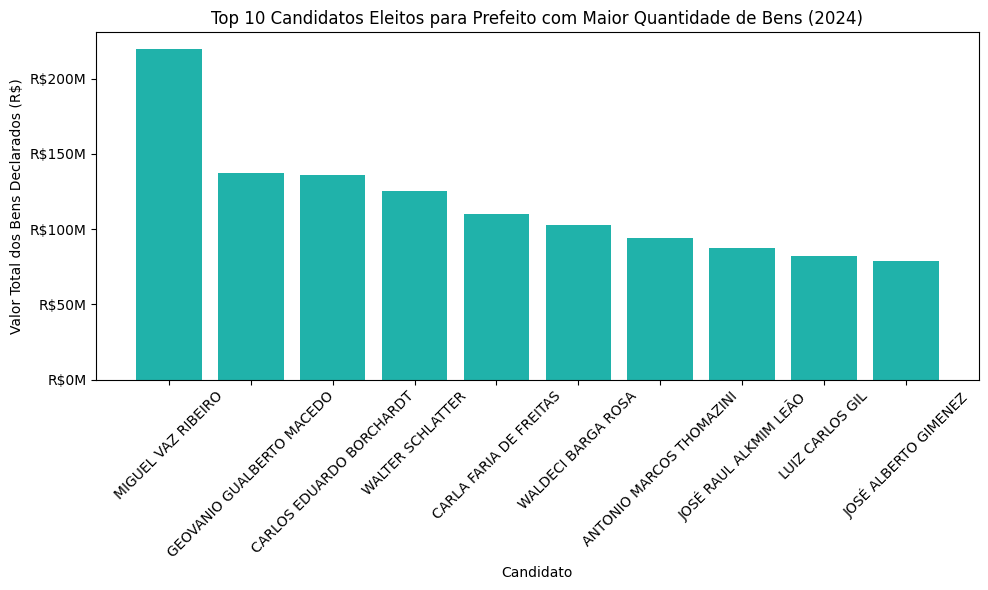

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Converter `VR_BEM_CANDIDATO` para float após remover caracteres não numéricos
bens['VR_BEM_CANDIDATO'] = bens['VR_BEM_CANDIDATO'].astype(str)  # Converter para string
bens['VR_BEM_CANDIDATO'] = bens['VR_BEM_CANDIDATO'].str.replace('[^0-9,]', '', regex=True)  # Remover caracteres não numéricos
bens['VR_BEM_CANDIDATO'] = bens['VR_BEM_CANDIDATO'].str.replace(',', '.').astype(float)  # Substituir vírgulas por pontos e converter para float

# Agrupar os bens por candidato e somar
bens_por_candidato = bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_por_candidato.rename(columns={'VR_BEM_CANDIDATO': 'valor_bens'}, inplace=True)

# Filtrar apenas os candidatos eleitos para prefeito
candidatos_2024_eleitos = candidatos[(candidatos['DS_SIT_TOT_TURNO'] == 'ELEITO') &
                                     (candidatos['DS_CARGO'] == 'PREFEITO')]

# Mesclar dados dos bens com candidatos eleitos
bens_eleitos = pd.merge(candidatos_2024_eleitos[['NM_UE', 'NM_CANDIDATO', 'SQ_CANDIDATO']],
                        bens_por_candidato, on='SQ_CANDIDATO', how='left')

# Identificar os candidatos eleitos com os maiores bens por município
bens_eleitos['maior_bem'] = bens_eleitos['valor_bens'] >= bens_eleitos.groupby('NM_UE')['valor_bens'].transform('max')
resultados_bens_eleitos = bens_eleitos[bens_eleitos['maior_bem']]

# Visualização: Top 10 candidatos eleitos com maior quantidade de bens
top10_bens_eleitos = bens_eleitos.nlargest(10, 'valor_bens')

plt.figure(figsize=(10, 6))
plt.bar(top10_bens_eleitos['NM_CANDIDATO'], top10_bens_eleitos['valor_bens'], color='lightseagreen')
plt.title('Top 10 Candidatos Eleitos para Prefeito com Maior Quantidade de Bens (2024)')
plt.xlabel('Candidato')
plt.ylabel('Valor Total dos Bens Declarados (R$)')

# Formatação para exibir valores em milhões
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R${x*1e-6:,.0f}M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### QUESTÃO 2
As maiores coligações (em número de partidos) foram as que mais ganharam
disputas?

    NUMERO_PARTIDOS  Candidatos_Eleitos
0                 1                1104
1                 2                7644
2                 3               12344
3                 4               14968
4                 5               14932
5                 6               14112
6                 7                9596
7                 8                8268
8                 9                4768
9                10                3408
10               11                1716
11               12                1584
12               13                 760
13               14                 840
14               15                  60
15               16                  64
16               17                 136
17               18                  72
Não, as maiores coligações (em número de partidos) não foram as que mais ganharam disputas. Pelo contrário, coligações de tamanho moderado (4 a 6 partidos) foram as mais bem-sucedidas em eleger candidatos. Isso pode indicar que, embora uma 

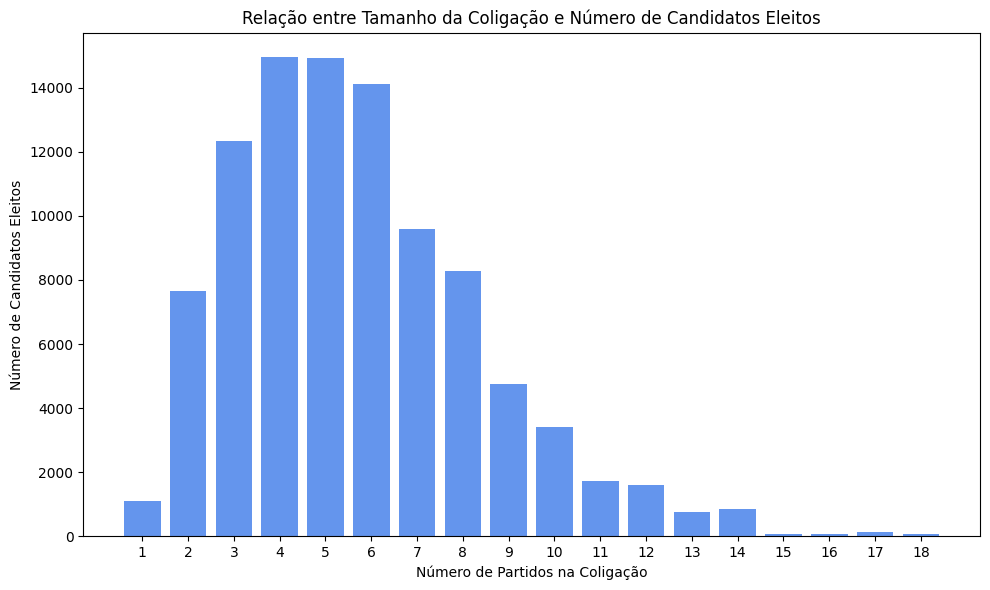

In [ ]:
coligacoes['NUMERO_PARTIDOS'] = coligacoes['DS_COMPOSICAO_COLIGACAO'].str.split('/').apply(len)

candidatos_eleitos = candidatos[(candidatos['DS_SIT_TOT_TURNO'] == 'ELEITO')]

candidatos_eleitos_coligacao = pd.merge(candidatos_eleitos[['SQ_COLIGACAO', 'SG_UF', 'NM_CANDIDATO']],
                                        coligacoes[['SQ_COLIGACAO', 'NUMERO_PARTIDOS']],
                                        on='SQ_COLIGACAO', how='left')

vitorias_por_tamanho_coligacao = candidatos_eleitos_coligacao.groupby('NUMERO_PARTIDOS').size().reset_index(name='Candidatos_Eleitos')

print(vitorias_por_tamanho_coligacao)
print("Não, as maiores coligações (em número de partidos) não foram as que mais ganharam disputas. Pelo contrário, coligações de tamanho moderado (4 a 6 partidos) foram as mais bem-sucedidas em eleger candidatos. Isso pode indicar que, embora uma coligação maior traga mais apoio político, um tamanho excessivo pode não se traduzir em sucesso eleitoral, possivelmente devido a desafios na coesão e alinhamento de objetivos entre muitos partidos.")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(vitorias_por_tamanho_coligacao['NUMERO_PARTIDOS'], vitorias_por_tamanho_coligacao['Candidatos_Eleitos'], color='cornflowerblue')
plt.title('Relação entre Tamanho da Coligação e Número de Candidatos Eleitos')
plt.xlabel('Número de Partidos na Coligação')
plt.ylabel('Número de Candidatos Eleitos')
plt.xticks(vitorias_por_tamanho_coligacao['NUMERO_PARTIDOS'])
plt.tight_layout()
plt.show()


# Questão 3
Qual partido tem a maior quantidade de candidatos por UF?
R: PSD

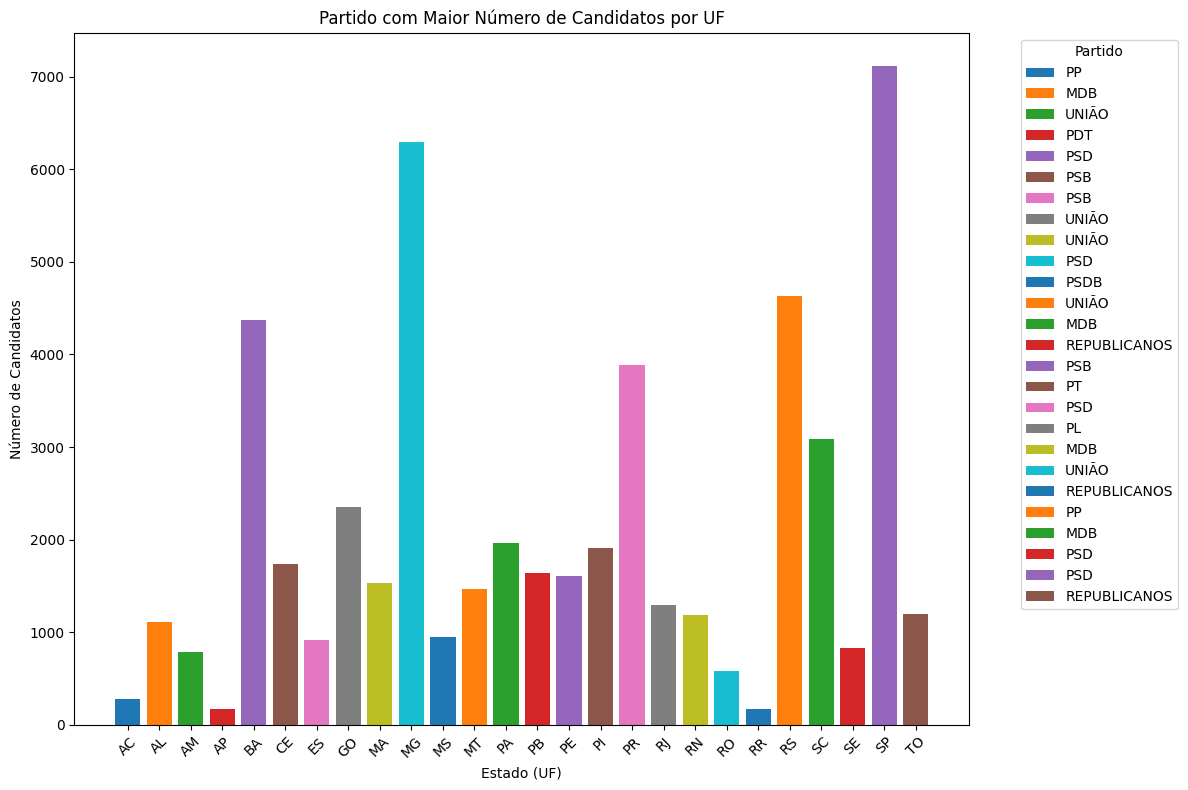

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

candidatos_por_uf_partido = candidatos.groupby(['SG_UF', 'SG_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

maior_partido_por_uf = candidatos_por_uf_partido.loc[candidatos_por_uf_partido.groupby('SG_UF')['NUM_CANDIDATOS'].idxmax()]

plt.figure(figsize=(12, 8))
for uf in maior_partido_por_uf['SG_UF'].unique():
    uf_data = maior_partido_por_uf[maior_partido_por_uf['SG_UF'] == uf]
    plt.bar(uf, uf_data['NUM_CANDIDATOS'].values[0], label=uf_data['SG_PARTIDO'].values[0])

plt.xlabel('Estado (UF)')
plt.ylabel('Número de Candidatos')
plt.title('Partido com Maior Número de Candidatos por UF')
plt.xticks(rotation=45)
plt.legend(title='Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 4. Existe uma tendência regional para maior número de candidaturas por partido?

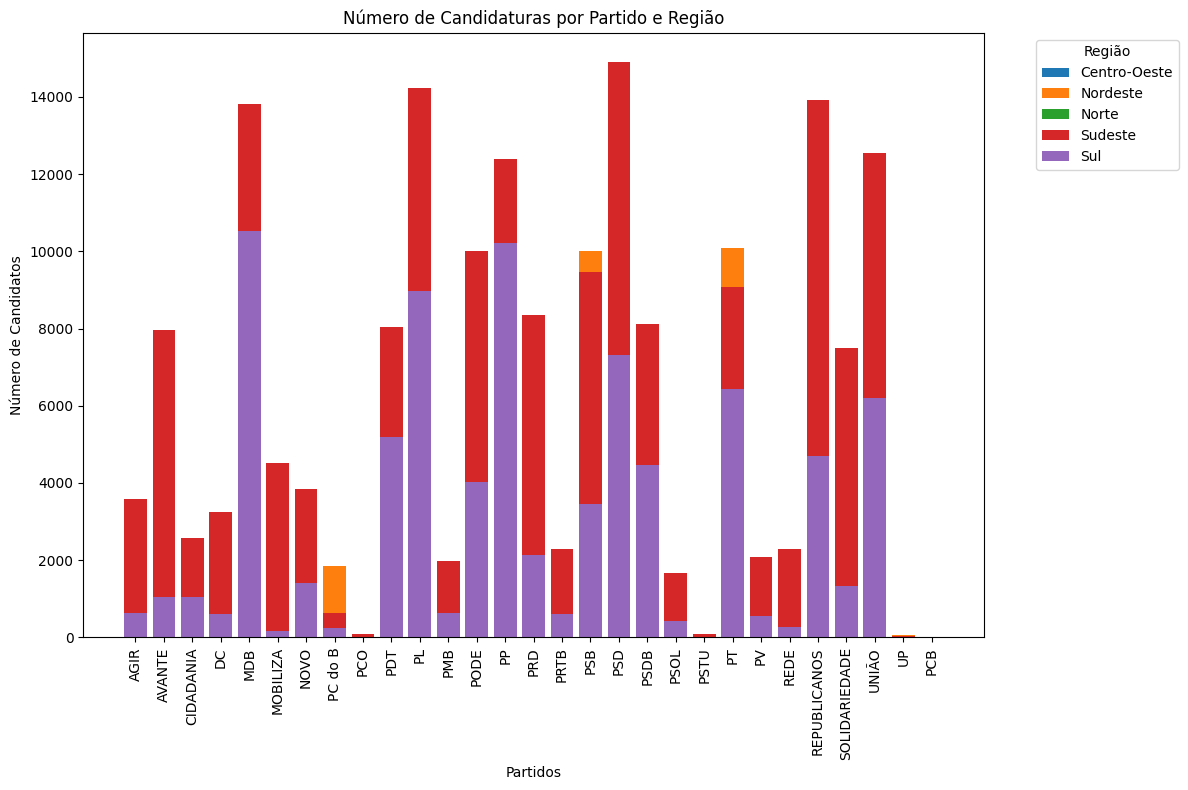

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def obter_regiao(uf):
    for regiao, ufs in regioes.items():
        if uf in ufs:
            return regiao
    return 'Desconhecido'

candidatos['REGIAO'] = candidatos['SG_UF'].apply(obter_regiao)

candidatos_por_regiao_partido = candidatos.groupby(['REGIAO', 'SG_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

plt.figure(figsize=(12, 8))
for regiao in candidatos_por_regiao_partido['REGIAO'].unique():
    regiao_data = candidatos_por_regiao_partido[candidatos_por_regiao_partido['REGIAO'] == regiao]
    plt.bar(regiao_data['SG_PARTIDO'], regiao_data['NUM_CANDIDATOS'], label=regiao)

plt.xlabel('Partidos')
plt.ylabel('Número de Candidatos')
plt.title('Número de Candidaturas por Partido e Região')
plt.xticks(rotation=90)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### QUESTÃO 5
### Qual o maior partido por UF em termos de candidatos
### (Prefeito+Vice+Vereadores)

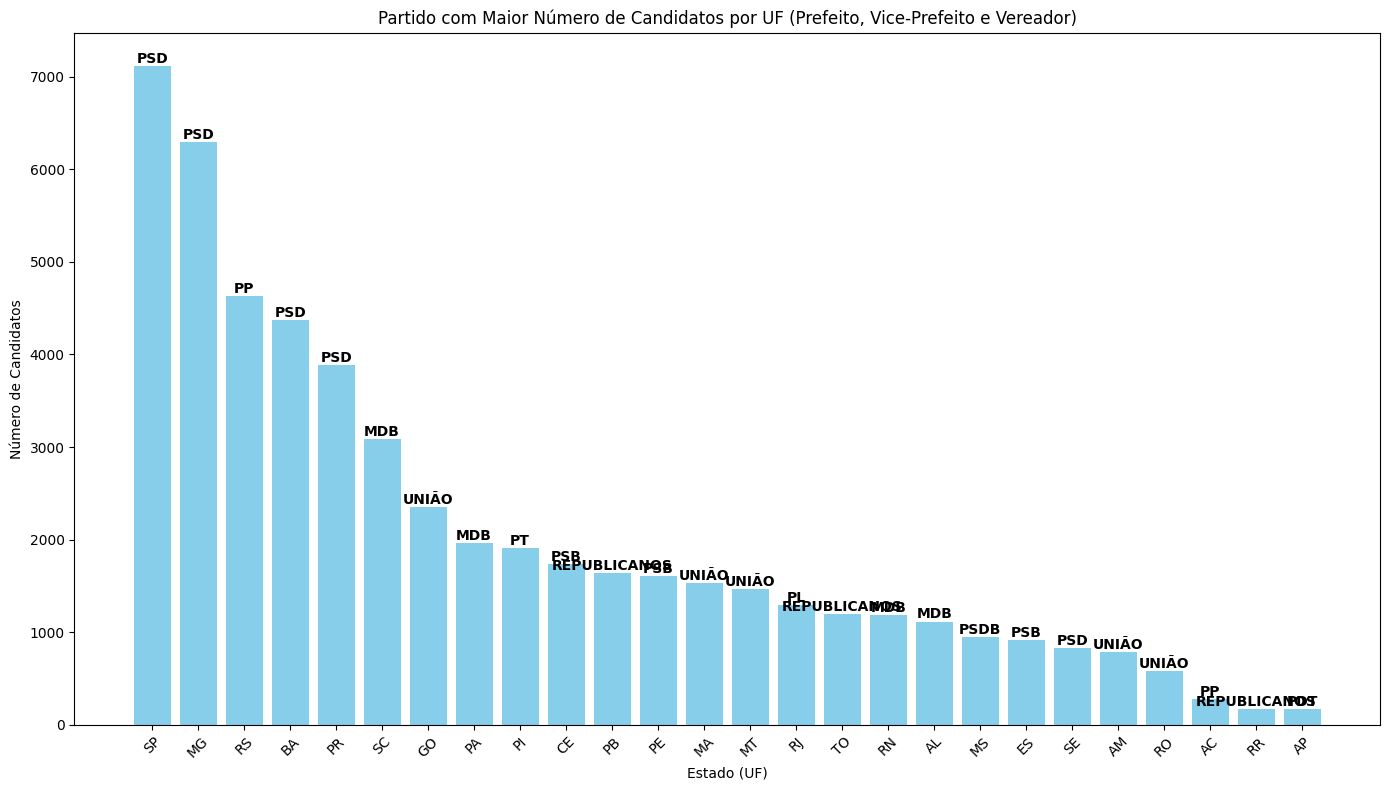

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cargos_relevantes = ['PREFEITO', 'VICE-PREFEITO', 'VEREADOR']
candidatos_filtrados = candidatos[candidatos['DS_CARGO'].isin(cargos_relevantes)]

candidatos_por_uf_partido = candidatos_filtrados.groupby(['SG_UF', 'SG_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

maior_partido_por_uf = candidatos_por_uf_partido.loc[candidatos_por_uf_partido.groupby('SG_UF')['NUM_CANDIDATOS'].idxmax()]

maior_partido_por_uf = maior_partido_por_uf.sort_values(by='NUM_CANDIDATOS', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(maior_partido_por_uf['SG_UF'], maior_partido_por_uf['NUM_CANDIDATOS'], color='skyblue')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Candidatos')
plt.title('Partido com Maior Número de Candidatos por UF (Prefeito, Vice-Prefeito e Vereador)')

for bar, partido in zip(bars, maior_partido_por_uf['SG_PARTIDO']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, partido, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## QUESTÃO 6
## Qual a região que mais registrou candidatos Indígenas e Quilombolas?

In [ ]:
import pandas as pd
import plotly.express as px

regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def obter_regiao(uf):
    for regiao, ufs in regioes.items():
        if uf in ufs:
            return regiao
    return 'Desconhecido'

candidatos['REGIAO'] = candidatos['SG_UF'].apply(obter_regiao)

candidatos_indigenas_quilombolas = candidatos[candidatos['DS_COR_RACA'].isin(['INDÍGENA', 'QUILOMBOLA'])]

contagem_por_regiao = candidatos_indigenas_quilombolas.groupby(['REGIAO', 'DS_COR_RACA']).size().reset_index(name='NUM_CANDIDATOS')

fig = px.bar(contagem_por_regiao, x='REGIAO', y='NUM_CANDIDATOS',
             labels={'REGIAO': 'Região', 'NUM_CANDIDATOS': 'Número de Candidatos',},
             title='Distribuição de Candidatos Indígenas e Quilombolas por Região')

fig.show()


### QUESTÃO 7
## 7. Qual a rede social preferida dos candidatos? Separe por partido e por UF.

In [ ]:
import pandas as pd
import plotly.express as px

todas_plataformas = ['Facebook', 'Instagram', 'Twitter', 'YouTube', 'WhatsApp', 'LinkedIn', 'Outros']

rede_social_uf = redes_sociais.groupby(['SG_UF', 'Plataforma']).size().reset_index(name='total_uso')

ufs = redes_sociais['SG_UF'].unique()
comb_uf_plataformas = pd.MultiIndex.from_product([ufs, todas_plataformas], names=['SG_UF', 'Plataforma'])
rede_social_uf = rede_social_uf.set_index(['SG_UF', 'Plataforma']).reindex(comb_uf_plataformas, fill_value=0).reset_index()

fig_uf = px.bar(
    rede_social_uf,
    x='SG_UF',
    y='total_uso',
    color='Plataforma',
    title='Uso de Redes Sociais por UF',
    labels={'total_uso': 'Total de Uso', 'SG_UF': 'UF'},
    hover_data={'Plataforma': True, 'total_uso': True}
)
fig_uf.update_layout(barmode='stack', xaxis_title='UF', yaxis_title='Total de Uso')
fig_uf.show()

if 'SG_PARTIDO' in redes_sociais.columns:
    redes_sociais = redes_sociais.drop(columns=['SG_PARTIDO'])

redes_sociais = pd.merge(redes_sociais, candidatos[['SQ_CANDIDATO', 'SG_PARTIDO']], on='SQ_CANDIDATO', how='left')

rede_social_partido = redes_sociais.groupby(['SG_PARTIDO', 'Plataforma']).size().reset_index(name='total_uso')

partidos = redes_sociais['SG_PARTIDO'].unique()
comb_partido_plataformas = pd.MultiIndex.from_product([partidos, todas_plataformas], names=['SG_PARTIDO', 'Plataforma'])
rede_social_partido = rede_social_partido.set_index(['SG_PARTIDO', 'Plataforma']).reindex(comb_partido_plataformas, fill_value=0).reset_index()

fig_partido = px.bar(
    rede_social_partido,
    x='SG_PARTIDO',
    y='total_uso',
    color='Plataforma',
    title='Uso de Redes Sociais por Partido',
    labels={'total_uso': 'Total de Uso', 'SG_PARTIDO': 'Partido'},
    hover_data={'Plataforma': True, 'total_uso': True}
)
fig_partido.update_layout(barmode='stack', xaxis_title='Partido', yaxis_title='Total de Uso')
fig_partido.show()


### Questão 8
# Utilize técnicas de NLP para determinar quais os principais # termos (propostas)
# presentes nos planos de governo de cada UF.

In [ ]:
pip install plotly

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import pandas as pd
import plotly.express as px

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))
partidos = ["pt", "psdb", "mdb", "dem", "psl", "pp", "psb", "republicanos", "podemos",
            "psc", "pl", "pdt", "pros", "psol",
            "novo", "pv", "pco", "up", "psdc", "prtb", "psd","prd","rede"]  # Lista de partidos comuns
stop_words.update(partidos)

candidatos_2024 = candidatos

candidatos_2024['propostas'] = candidatos_2024['DS_COMPOSICAO_COLIGACAO'].fillna('')

def extrair_termos(texto):
    tokens = word_tokenize(texto.lower())
    return [t for t in tokens if t.isalpha() and t not in stop_words]

uf_termos_data = []
for uf in candidatos_2024['SG_UF'].unique():
    propostas_uf = " ".join(candidatos_2024[candidatos_2024['SG_UF'] == uf]['propostas'])
    termos = extrair_termos(propostas_uf)
    termos_mais_frequentes = Counter(termos).most_common(10)

    for termo, frequencia in termos_mais_frequentes:
        uf_termos_data.append({'UF': uf, 'Termo': termo, 'Frequência': frequencia})

termos_df = pd.DataFrame(uf_termos_data)
termos_df = termos_df.pivot(index='UF', columns='Termo', values='Frequência').fillna(0)

termos_df_reset = termos_df.reset_index().melt(id_vars=['UF'], var_name='Termo', value_name='Frequência')

fig = px.bar(
    termos_df_reset,
    x='UF',
    y='Frequência',
    color='Termo',
    title='Termos Mais Frequentes nas Propostas dos Candidatos por UF (Excluindo Partidos)',
    labels={'Frequência': 'Frequência dos Termos'},
    hover_name='Termo',
    hover_data={'Termo': True, 'Frequência': True},
)

fig.update_layout(barmode='stack', xaxis_title='UF', yaxis_title='Frequência dos Termos')
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Questão 9
Baixe os dados totalizados da eleição de 2020, utilize uma cor para cada
partido, e crie um mapa colorido para cada UF do Brasil, pintando o município
de acordo com a legenda do partido vencedor no município. Você pode colocar
uma “bolinha” ou marcador na cidade com a cor desejada (use a biblioteca
folium para isso).


In [ ]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import os
import gdown

file_ids = {
    "cpg": '1CbuoabOCWwE5Qb_4g_KL28DdjxKDQNkV',
    "dbf": '1q7BG_3YzSCbeZTYvgq348vr9YcNKcJP6',
    "prj": '1ukXo8vMw09QWde3Dji_bpxvK1nLEAofh',
    "shp": '1jvBQfQYdpIo7p2rB7JEU8Hurgzb9na50',
    "shx": '1Za4M6l8JgABAKX2qBKCtGJUa98Or0K97'
}

os.makedirs("brasil_shapefile", exist_ok=True)

for ext, file_id in file_ids.items():
    output = f"brasil_shapefile/BR_Municipios_2022.{ext}"
    gdown.download(id=file_id, output=output, quiet=False)

shapefile_path = "brasil_shapefile/BR_Municipios_2022.shp"
municipios = gpd.read_file(shapefile_path)

municipios['geometry'] = municipios['geometry'].simplify(tolerance=0.05, preserve_topology=True)

parties = ['Partido A', 'Partido B', 'Partido C', 'Partido D', 'Partido E']
election_data = pd.DataFrame({
    'CD_MUN': municipios['CD_MUN'],
    'partido_vencedor': np.random.choice(parties, size=len(municipios))
})

municipios = municipios.merge(election_data, on='CD_MUN')

unique_parties = municipios['partido_vencedor'].unique()

colors = plt.colormaps['tab20'].colors[:len(unique_parties)]

party_colors = {party: color for party, color in zip(unique_parties, colors)}

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(
        int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)
    )

party_colors_hex = {party: rgb_to_hex(color) for party, color in party_colors.items()}

municipios_proj = municipios.to_crs(epsg=3857)

municipios_proj['centroid'] = municipios_proj.geometry.centroid

municipios = municipios_proj.to_crs(epsg=4326)
municipios['centroid'] = municipios['centroid'].to_crs(epsg=4326)

mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4, tiles='cartodbpositron')

def style_function(feature):
    partido = feature['properties']['partido_vencedor']
    return {
        'fillColor': party_colors_hex.get(partido, '#ffffff'),
        'color': 'black',
        'weight': 0.1,
        'fillOpacity': 0.7,
    }

folium.GeoJson(
    municipios[['geometry', 'NM_MUN', 'SIGLA_UF', 'partido_vencedor']],
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NM_MUN', 'SIGLA_UF', 'partido_vencedor'],
        aliases=['Município', 'UF', 'Partido Vencedor'],
        localize=True
    )
).add_to(mapa)

for idx, row in municipios.iterrows():
    centroid = row['centroid']
    folium.CircleMarker(
        location=[centroid.y, centroid.x],
        radius=1,
        color=party_colors_hex.get(row['partido_vencedor'], '#ffffff'),
        fill=True,
        fill_color=party_colors_hex.get(row['partido_vencedor'], '#ffffff'),
        fill_opacity=1
    ).add_to(mapa)

legend_html = '''
<div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: auto;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white; opacity: 0.8;
     padding: 10px;
     ">
     <b>Legenda de Partidos</b><br>
'''
for party, color in party_colors_hex.items():
    legend_html += f'<i style="background:{color};width:18px;height:18px;float:left;margin-right:8px;"></i>{party}<br>'

legend_html += '</div>'

mapa.get_root().html.add_child(folium.Element(legend_html))

mapa

Downloading...
From: https://drive.google.com/uc?id=1CbuoabOCWwE5Qb_4g_KL28DdjxKDQNkV
To: /content/brasil_shapefile/BR_Municipios_2022.cpg
100%|██████████| 5.00/5.00 [00:00<00:00, 16.1kB/s]
Downloading...
From: https://drive.google.com/uc?id=1q7BG_3YzSCbeZTYvgq348vr9YcNKcJP6
To: /content/brasil_shapefile/BR_Municipios_2022.dbf
100%|██████████| 446k/446k [00:00<00:00, 92.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ukXo8vMw09QWde3Dji_bpxvK1nLEAofh
To: /content/brasil_shapefile/BR_Municipios_2022.prj
100%|██████████| 174/174 [00:00<00:00, 624kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1jvBQfQYdpIo7p2rB7JEU8Hurgzb9na50
From (redirected): https://drive.google.com/uc?id=1jvBQfQYdpIo7p2rB7JEU8Hurgzb9na50&confirm=t&uuid=43a7e6af-d6b6-4e86-91f1-0cff39a33e15
To: /content/brasil_shapefile/BR_Municipios_2022.shp
100%|██████████| 252M/252M [00:05<00:00, 46.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Za4M6l8JgABAKX2qBKCtGJUa98Or0K97
To: /conte